In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
import pandas as pd
names1880 = pd.read_csv("/Users/amitkumarsahu/Desktop/babynames/yob1880.txt",names=['name', 'sex', 'Name_Number'])
names1880

,name,sex,Name_Number
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [39]:
names1880['year']=1880
names1880.head()

,name,sex,Name_Number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [32]:
names1880['Name_Number'].groupby(names1880['sex']).sum()

sex
F     90993
M    110493
Name: Name_Number, dtype: int64

In [33]:
names1880.Name_Number.groupby(names1880.sex).sum()

sex
F     90993
M    110493
Name: Name_Number, dtype: int64

In [34]:
names1880.groupby('sex').Name_Number.sum() ## Groupby command?

sex
F     90993
M    110493
Name: Name_Number, dtype: int64

In [41]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'Name_Number']

for i in years:
    
    path = '/Users/amitkumarsahu/Desktop/babynames/yob%d.txt'% i
    frame = pd.read_csv(path, names=columns)

    frame['year'] =i
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True) ## Concat command?

In [42]:
names

,name,sex,Name_Number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [43]:
total_births = names.pivot_table('Name_Number', index ='year',columns='sex', aggfunc=sum)
total_births.head()  ##  pivot_table ?

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


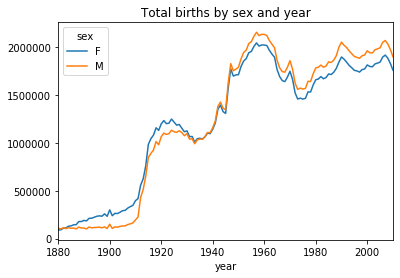

In [44]:
total_births.plot(title='Total births by sex and year')##

Next, let’s insert a column prop with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name. Thus, we group the data by year and sex,then add the new column to each group:

In [47]:
def add_prop(x):
    x['prop'] = (x.Name_Number)*100/ x.Name_Number.sum()
    return x

names = names.groupby(['year', 'sex']).apply(add_prop)


In [46]:
names

,name,sex,Name_Number,year,prop
0,Mary,F,7065,1880,7.764334
1,Anna,F,2604,1880,2.861759
2,Emma,F,2003,1880,2.201268
3,Elizabeth,F,1939,1880,2.130933
4,Minnie,F,1746,1880,1.918829
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000263
1690780,Zyonne,M,5,2010,0.000263
1690781,Zyquarius,M,5,2010,0.000263
1690782,Zyran,M,5,2010,0.000263


In [48]:
#Sanity check
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      100.0
      M      100.0
1881  F      100.0
      M      100.0
1882  F      100.0
             ...  
2008  M      100.0
2009  F      100.0
      M      100.0
2010  F      100.0
      M      100.0
Name: prop, Length: 262, dtype: float64

Extract a subset of the data to facilitate further analysis: the top 1,000 names for each sex/year combination. This is yet another
group operation:

In [49]:
def get_top1000(group):
    return group.sort_values(by='Name_Number', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [ ]:
top1000

###### Analysing Naming Trends
    Splitting the Top 1,000 names into the boy and girl portions is easy to do first:

In [50]:
boys = top1000[top1000['sex'] == 'M'] ## or boys = top1000[top1000.sex == 'M']
girls = top1000[top1000['sex'] == 'F']

In [51]:
boys

,name,sex,Name_Number,year,prop
942,John,M,9655,1880,8.738110
943,William,M,9533,1880,8.627696
944,James,M,5927,1880,5.364141
945,Charles,M,5348,1880,4.840126
946,George,M,5126,1880,4.639208
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.010219
261873,Destin,M,194,2010,0.010219
261874,Jaquan,M,194,2010,0.010219
261875,Jaydan,M,194,2010,0.010219


In [52]:
girls

,name,sex,Name_Number,year,prop
0,Mary,F,7065,1880,7.764334
1,Anna,F,2604,1880,2.861759
2,Emma,F,2003,1880,2.201268
3,Elizabeth,F,1939,1880,2.130933
4,Minnie,F,1746,1880,1.918829
...,...,...,...,...,...
260872,Violeta,F,250,2010,0.014213
260873,Leilah,F,250,2010,0.014213
260874,Alaysia,F,250,2010,0.014213
260875,Dania,F,249,2010,0.014156


forming a pivot table of the total number of births by year and name:

In [53]:
total_births = top1000.pivot_table('Name_Number', index='year',
                                   columns='name',
                                   aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


This can be plotted for a handful of names with DataFrame’s plot method

array([<matplotlib.axes._subplots.AxesSubplot object at 0x123c10450>,
      dtype=object)

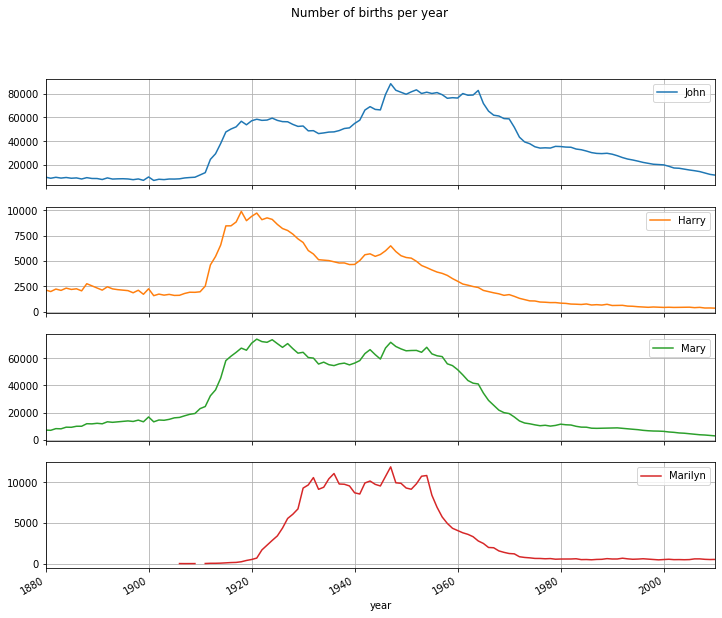

In [55]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=True,title="Number of births per year") 
## Subplot ?

##### Measuring the increase in naming diversity

One explanation for the decrease in plots is that fewer parents are choosing common names for their children. This hypothesis can be explored and confirmed in the data.One measure is the proportion of births represented by the top 1,000 most popular names, which are aggregated and ploted by year and sex as given below:

<Figure size 432x288 with 0 Axes>

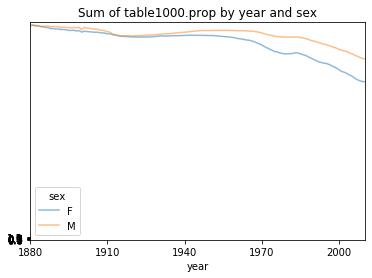

In [56]:
plt.figure()
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 30),alpha=0.5)

In [ ]:
table

Indeed, there appears to be increasing name diversity (decreasing
total proportion in the top 1,000). Another interesting metric is the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births. This number is a bit more tricky to compute. Let’s consider just the boy names from 2010:

In [57]:
df = boys[boys.year == 2010]
df

,name,sex,Name_Number,year,prop
260877,Jacob,M,21875,2010,1.152297
260878,Ethan,M,17866,2010,0.941117
260879,Michael,M,17133,2010,0.902505
260880,Jayden,M,17030,2010,0.897080
260881,William,M,16870,2010,0.888651
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.010219
261873,Destin,M,194,2010,0.010219
261874,Jaquan,M,194,2010,0.010219
261875,Jaydan,M,194,2010,0.010219


After sorting prop in descending order, we want to know how many of the most popular names it takes to reach 50%. You could write a for loop to do this, but a vectorized NumPy way is a bit more clever. Taking the cumulative sum, cumsum, of prop and then calling the method searchsorted returns the position in the cumulative sum at which 0.5 would need to be inserted to keep it in sorted order:

In [58]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    1.152297
260878    2.093414
260879    2.995920
260880    3.892999
260881    4.781651
260882    5.657871
260883    6.515496
260884    7.341410
260885    8.152785
260886    8.962106
Name: prop, dtype: float64

In [59]:
prop_cumsum.values.searchsorted(0.5)

0

Since arrays are zero-indexed, adding 1 to this result gives you a result of 117. By contrast, in 1900 this number was much smaller:

In [60]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

1

We can now apply this operation to each year/sex combination, groupby those fields, and apply a function returning the count for each group:

In [62]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [63]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [64]:
diversity.head()

sex,F,M
year,,
1880,1,1
1881,1,1
1882,1,1
1883,1,1
1884,1,1


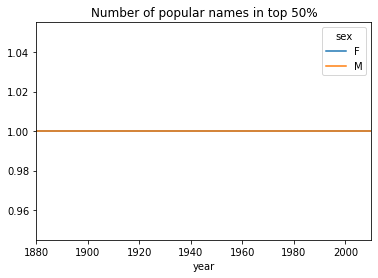

In [65]:
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

#### Boy names that became girl names (and vice versa)

Another fun trend is looking at boy names that were more popular with one sex earlier in the sample but have “changed sexes” in the present. One example is the name Lesley or Leslie. Going back to the top1000 DataFrame, I compute a list of names occurring in the dataset starting with “lesl”:

In [66]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

From there, we can filter down to just those names and sum births grouped by name to see the relative frequencies:

In [67]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').Name_Number.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: Name_Number, dtype: int64

Next, let’s aggregate by sex and year and normalize within year:

In [68]:
table = filtered.pivot_table('Name_Number', index='year',
                             columns='sex', aggfunc='sum')
table.head()

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [69]:
table = table.div(table.sum(1), axis=0)## Normalization
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


In [ ]:
table.plot(title="lesley_like name as male and female transition",style={'M': 'k-', 'F': 'k--'})